## import das bibliotecas

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

abrir a base

In [90]:
bd = pd.read_csv('datasus_suicidio_2014_2018.csv', encoding='latin1')
bd

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,NaN,NaN,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,05-02-14,04-07-99,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,06-02-14,02-05-72,Masculino,Branca,NaN,NaN,0,Rio Branco,Outros,Não,X700,X700,42.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,16-04-18,17-11-89,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,14-05-18,03-07-90,Feminino,Parda,União consensual,NaN,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,15-05-18,08-08-55,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,24-07-18,27-06-01,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


17 colunas o arquivo label.txt fala mais sobre cada uma

In [91]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58634 entries, 0 to 58633
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estado      58634 non-null  object 
 1   ano         58634 non-null  int64  
 2   CIRCOBITO   56606 non-null  object 
 3   DTOBITO     58634 non-null  object 
 4   DTNASC      58407 non-null  object 
 5   SEXO        58619 non-null  object 
 6   RACACOR     57298 non-null  object 
 7   ESTCIV      54305 non-null  object 
 8   ESC         45162 non-null  object 
 9   OCUP        58634 non-null  object 
 10  CODMUNRES   58634 non-null  object 
 11  LOCOCOR     58463 non-null  object 
 12  ASSISTMED   40872 non-null  object 
 13  CAUSABAS    58634 non-null  object 
 14  CAUSABAS_O  58544 non-null  object 
 15  idade       58407 non-null  float64
 16  mes         58634 non-null  int64  
dtypes: float64(1), int64(2), object(14)
memory usage: 7.6+ MB


os dados nulos

In [92]:
bd.isnull().sum()

estado            0
ano               0
CIRCOBITO      2028
DTOBITO           0
DTNASC          227
SEXO             15
RACACOR        1336
ESTCIV         4329
ESC           13472
OCUP              0
CODMUNRES         0
LOCOCOR         171
ASSISTMED     17762
CAUSABAS          0
CAUSABAS_O       90
idade           227
mes               0
dtype: int64

ver o numero de jovens e o quanto representa na base

In [93]:
jovens = bd[(bd['CIRCOBITO'] == 'Suicídio') & (bd['idade'] < 24)].shape[0]
adultos = bd[(bd['CIRCOBITO'] == 'Suicídio') & (bd['idade'] > 24)].shape[0]
print(f'Numero de jovens : {jovens}')
print(f'Numero de adultos : {adultos}')

Numero de jovens : 8162
Numero de adultos : 46063


In [94]:
percentJovem = (jovens / (jovens+adultos)) * 100
print(f'Porcentagem de jovens: {percentJovem:.2f}%')
percentAdultos = (adultos / (jovens+adultos)) * 100
print(f'Porcentagem de adultos: {percentAdultos:.2f}%')

Porcentagem de jovens: 15.05%
Porcentagem de adultos: 84.95%


ver que tem estudantes de todas as idades

In [95]:
bd[(bd['idade'] > 20) & (bd['OCUP'] == 'ESTUDANTE')]

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
70,AL,2014,Suicídio,11-03-14,07-05-87,Feminino,Parda,Solteiro,NaN,ESTUDANTE,Maceió,Domicílio,NaN,X709,X709,27.0,3
127,AL,2014,Suicídio,15-09-14,14-09-93,Masculino,Parda,Solteiro,NaN,ESTUDANTE,Maceió,Outros,NaN,X789,X789,21.0,9
163,AL,2014,Suicídio,21-12-14,04-02-92,Feminino,Parda,Solteiro,NaN,ESTUDANTE,Palmeira Dos Índios,Domicílio,NaN,X700,X700,22.0,12
168,AP,2014,Suicídio,19-01-14,12-07-93,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Santana,Domicílio,Não,X709,X709,21.0,1
235,AM,2014,NaN,17-02-14,14-09-93,Feminino,Indígena,Solteiro,4 a 7 anos,ESTUDANTE,Atalaia do Norte,Domicílio,Não,X709,X709,21.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58603,TO,2018,Suicídio,01-08-18,15-07-94,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Domicílio,Não,X740,X740,24.0,8
58611,TO,2018,Suicídio,01-11-18,29-11-97,Masculino,Branca,Solteiro,8 a 11 anos,ESTUDANTE,Aragominas,Domicílio,Não,X730,X730,21.0,11
58623,TO,2018,Suicídio,22-02-18,25-04-78,Masculino,Parda,Solteiro,NaN,ESTUDANTE,Bom Jesus do Tocantins,Domicílio,Não,X740,X740,40.0,2
58624,TO,2018,Suicídio,02-03-18,14-02-63,Feminino,Parda,Casado,NaN,ESTUDANTE,Aparecida do Rio Negro,Domicílio,Não,X700,X700,55.0,3


nova coluna para categorizar a idade

In [96]:
def classificarIdade(idade):
    if idade <= 24:
        return 'Jovem'
    elif 24 < idade <= 59:
        return 'Adulto'
    else:
        return 'Idoso'
    
bd['categoria_idade'] = bd['idade'].apply(classificarIdade)

In [97]:
bd

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,categoria_idade
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1,Adulto
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1,Adulto
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,NaN,NaN,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1,Idoso
3,AC,2014,Suicídio,05-02-14,04-07-99,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2,Jovem
4,AC,2014,Suicídio,06-02-14,02-05-72,Masculino,Branca,NaN,NaN,0,Rio Branco,Outros,Não,X700,X700,42.0,2,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,16-04-18,17-11-89,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4,Adulto
58630,TO,2018,Suicídio,14-05-18,03-07-90,Feminino,Parda,União consensual,NaN,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5,Adulto
58631,TO,2018,Suicídio,15-05-18,08-08-55,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5,Idoso
58632,TO,2018,Suicídio,24-07-18,27-06-01,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7,Jovem


sp geral se mata

<Axes: xlabel='estado'>

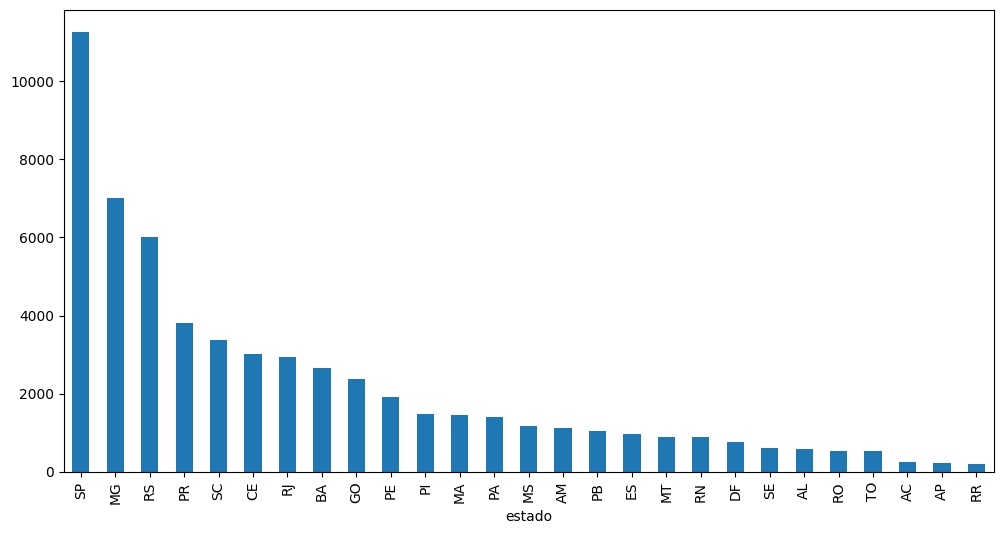

In [98]:
plt.figure(figsize=(12, 6))
bd['estado'].value_counts().plot.bar()

em todo mes se matam (nao tem tempo bom)

<Axes: xlabel='mes'>

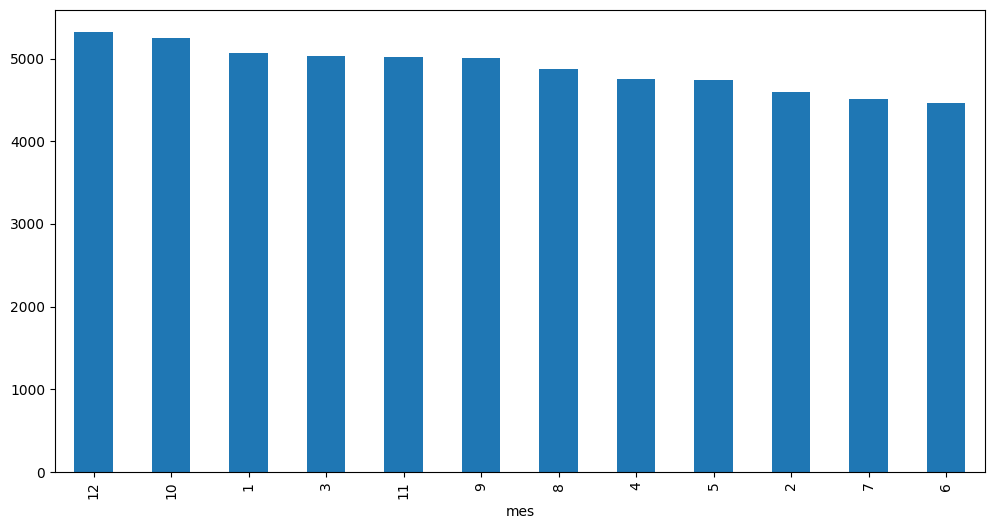

In [99]:
plt.figure(figsize=(12, 6))
bd['mes'].value_counts().plot.bar()

a maioria que se mata e branca mas isso pq a base tem mais pessoas brancas

<Axes: xlabel='RACACOR'>

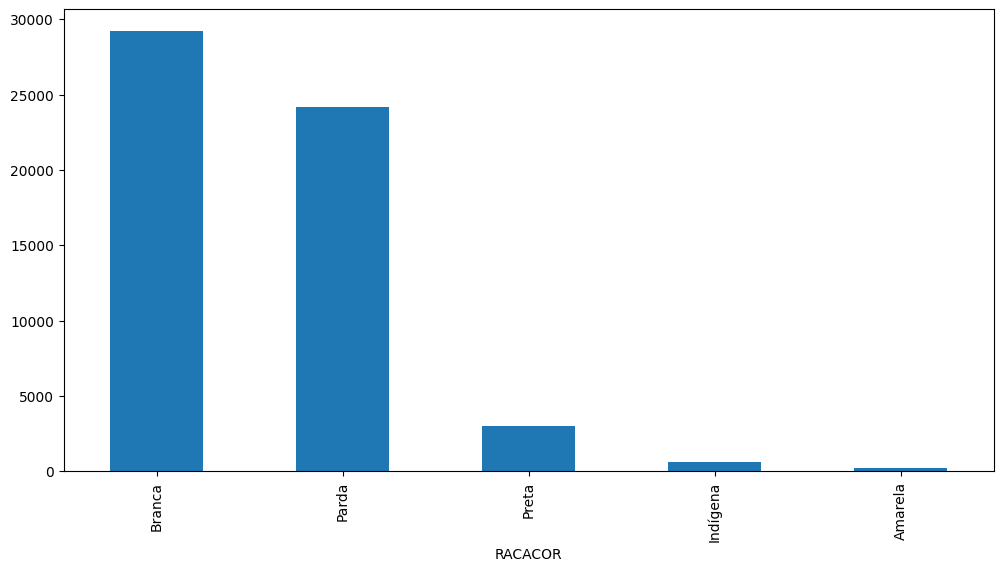

In [100]:
plt.figure(figsize=(12, 6))
bd['RACACOR'].value_counts().plot.bar()

<Axes: ylabel='count'>

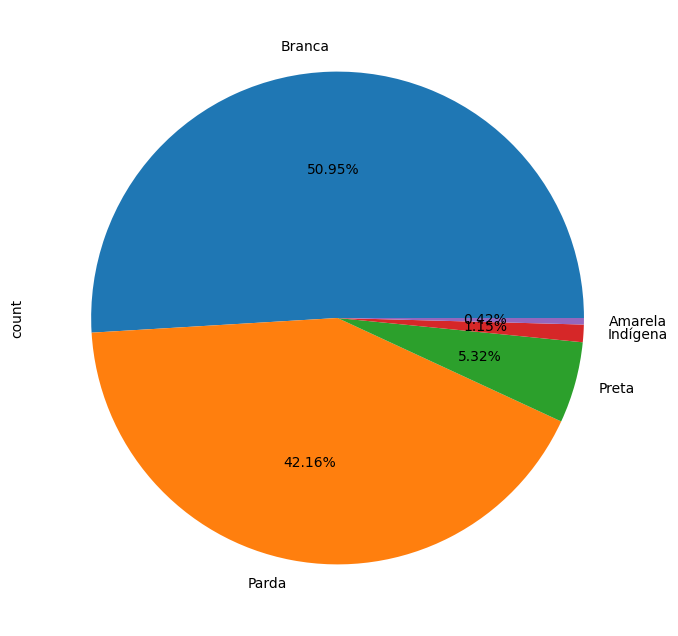

In [101]:
bd['RACACOR'].value_counts().plot.pie(autopct='%0.2f%%', figsize=(8, 8))

a base e maioria homem

<Axes: ylabel='count'>

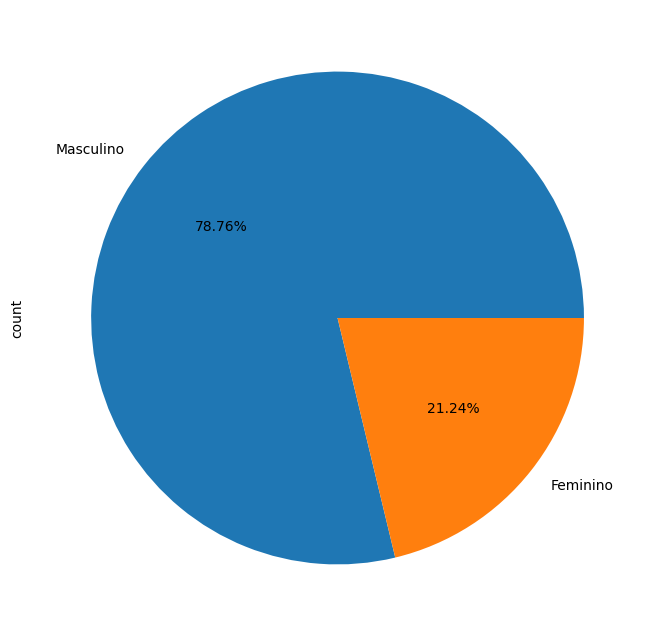

In [102]:
bd['SEXO'].value_counts().plot.pie(autopct='%0.2f%%', figsize=(8, 8))

maioria solteiro (falam que "uma das principais causas do suicidio sao por outra pessoas" (hoender 2024))

teve ter algum dado q comprove isso

<Axes: ylabel='count'>

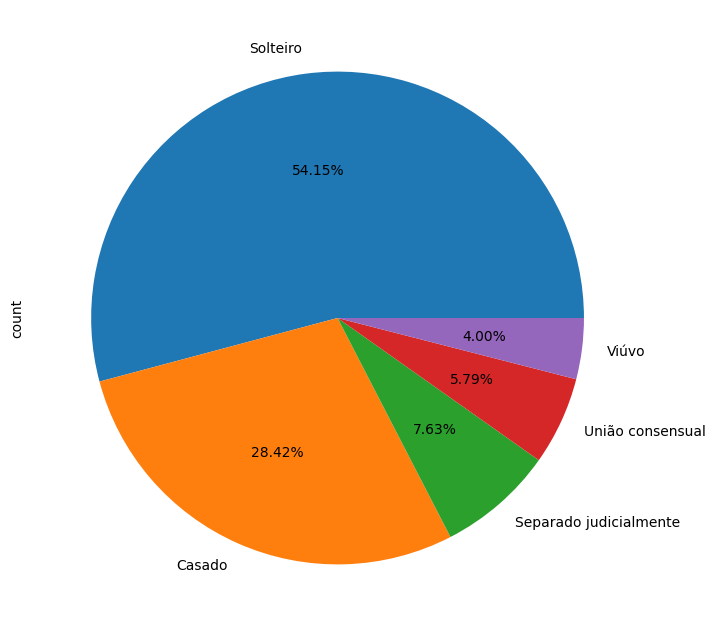

In [103]:
bd['ESTCIV'].value_counts().plot.pie(autopct='%0.2f%%', figsize=(8, 8))

maioria adulto mas esta erra pq os dados nulos esta contados como idoso

<Axes: ylabel='count'>

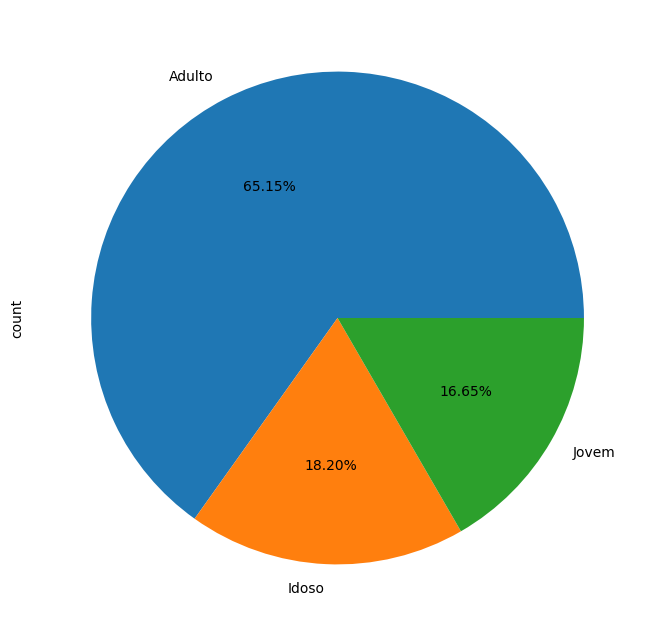

In [104]:
bd['categoria_idade'].value_counts().plot.pie(autopct='%0.2f%%', figsize=(8, 8))

tem outras causas na base mas a principal e o suicidio

<Axes: xlabel='CIRCOBITO'>

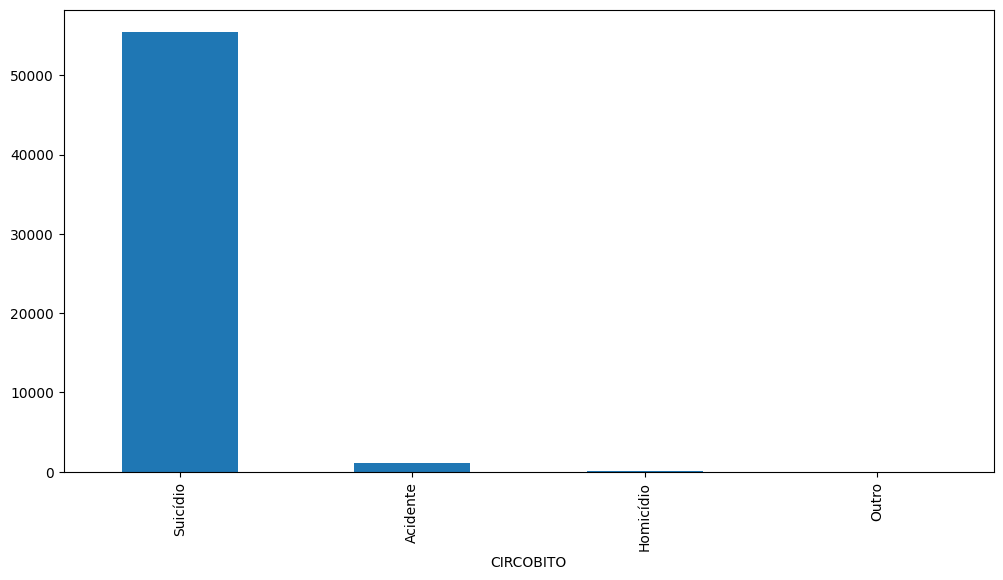

In [105]:
plt.figure(figsize=(12, 6))
bd['CIRCOBITO'].value_counts().plot.bar()

preenchendo dados nulos do sexo

In [106]:
bd[(bd['SEXO'].isnull()) & (bd['RACACOR'] == 'Indígena')]

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,categoria_idade
10613,TO,2014,Suicídio,01-02-14,20-03-90,NaN,Indígena,Solteiro,Nenhuma,0,Lagoa da Confusão,Domicílio,Não,X700,X700,24.0,2,Jovem


relacionar com as coisas que tem em comum

In [107]:
pren = bd[(bd['RACACOR'] == 'Indígena') & (bd['categoria_idade'] == 'Jovem') & (bd['OCUP'] == '0')  & (bd['LOCOCOR'] == 'Domicílio') & (bd['CAUSABAS'] == 'X700') & (bd['CAUSABAS_O'] == 'X700') & (bd['ASSISTMED'] == 'Não')]

In [108]:
pren['SEXO'] = pren['SEXO'].map({'Masculino': 1, 'Feminino': 0})

C:\Users\Vitor\AppData\Local\Temp\ipykernel_12272\1835943331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pren['SEXO'] = pren['SEXO'].map({'Masculino': 1, 'Feminino': 0})


In [109]:
pren['SEXO'].mode()

0    1.0
Name: SEXO, dtype: float64

In [110]:
pren['SEXO'].median()

1.0

tem 65 porcento de ser homem o que em uma base de maioria masculina eu acho pouco

In [111]:
# SEI NAO EM 
pren['SEXO'].mean()

0.6551724137931034

mas coloquei como homem

In [112]:
bd.loc[(bd['SEXO'].isnull()) & (bd['RACACOR'] == 'Indígena'), 'SEXO'] = 'Masculino'

deletei as outras pq nao tinha como relacionar

In [113]:
bd[(bd['SEXO'].isnull())]

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,categoria_idade
11076,AM,2015,Suicídio,26-06-15,NaN,NaN,NaN,NaN,NaN,0,Rio Preto da Eva,Outros,Não,X700,X700,NaN,6,Idoso
15216,PA,2015,Suicídio,05-07-15,NaN,NaN,Parda,NaN,NaN,0,Novo Repartimento,Outros,Não,X709,X709,NaN,7,Idoso
22773,BA,2016,Suicídio,03-12-16,NaN,NaN,NaN,NaN,NaN,0,Porto Seguro,NaN,NaN,X709,X709,NaN,12,Idoso
30980,SP,2016,Suicídio,10-01-16,23-08-77,NaN,NaN,NaN,NaN,0,São José Dos Campos,Hospital,NaN,X689,K920,39.0,1,Adulto
36294,MT,2017,Suicídio,27-01-17,NaN,NaN,Parda,NaN,NaN,0,Lucas do Rio Verde,Domicílio,Não,X700,X700,NaN,1,Idoso
38407,PA,2017,Suicídio,10-09-17,NaN,NaN,NaN,NaN,NaN,0,Marabá,Outros,Não,X700,X700,NaN,9,Idoso
38459,PA,2017,Suicídio,17-02-17,NaN,NaN,NaN,NaN,NaN,0,Marabá,NaN,NaN,X709,X709,NaN,2,Idoso
39231,PR,2017,Suicídio,05-11-17,NaN,NaN,NaN,NaN,NaN,0,410000,Outros,Não,X701,X701,NaN,11,Idoso
39987,PI,2017,Suicídio,11-07-17,NaN,NaN,NaN,NaN,NaN,0,Monsenhor Gil,Hospital,Sim,X760,X760,NaN,7,Idoso
47856,ES,2018,Suicídio,03-05-18,17-11-76,NaN,Parda,NaN,NaN,0,Vila Velha,Hospital,Sim,X709,R99,42.0,5,Adulto


In [114]:
bd.dropna(subset=['SEXO'], inplace=True)

nao tem mais dados nulos

In [115]:
bd[(bd['SEXO'].isnull())]

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,categoria_idade


CIRCOBITO  pulei essa pq com e mais facil achar com todos os outros dados preenchidos

In [116]:
bd[bd['CIRCOBITO'].isnull()]

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,categoria_idade
57,AL,2014,NaN,11-02-14,24-09-39,Feminino,Parda,Viúvo,Nenhuma,APOSENTADO/PENSIONISTA,Arapiraca,Domicílio,Não,X699,X699,75.0,2,Idoso
66,AL,2014,NaN,28-02-14,28-04-83,Feminino,Parda,Casado,8 a 11 anos,EMPREGADO DOMESTICO NOS SERVICOS GERAIS,Coité do Nóia,Domicílio,NaN,X700,X700,31.0,2,Adulto
103,AL,2014,NaN,09-06-14,13-06-69,Masculino,Parda,Solteiro,NaN,TRABALHADOR VOLANTE DA AGRICULTURA,Estrela de Alagoas,Domicílio,Não,X709,X709,45.0,6,Adulto
212,AM,2014,NaN,16-01-14,13-12-93,Masculino,Indígena,Solteiro,8 a 11 anos,0,Tabatinga,Domicílio,NaN,X700,X700,21.0,1,Jovem
218,AM,2014,NaN,25-01-14,20-12-42,Masculino,Parda,Viúvo,4 a 7 anos,0,Codajás,Domicílio,NaN,X700,X700,72.0,1,Idoso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58205,SP,2018,NaN,21-10-18,14-05-87,Masculino,Branca,Solteiro,12 e mais,"OPERADOR DE MAQUINAS FIXAS, EM GERAL",Moji-mirim,Hospital,NaN,X649,X649,31.0,10,Adulto
58297,SP,2018,NaN,29-12-18,05-01-86,Masculino,Branca,Solteiro,4 a 7 anos,AJUDANTE DE MOTORISTA,Bebedouro,Domicílio,Não,X700,X700,32.0,12,Adulto
58361,SP,2018,NaN,28-12-18,20-08-79,Masculino,Branca,Solteiro,12 e mais,COMERCIANTE ATACADISTA,Itanhaém,Domicílio,NaN,X780,X780,39.0,12,Adulto
58466,SE,2018,NaN,24-12-18,07-09-49,Masculino,Preta,Casado,Nenhuma,0,Itaporanga D´ajuda,Outro estabelecimento de saúde,Sim,X689,X689,69.0,12,Idoso


In [117]:
bd[bd['CIRCOBITO'] == 'Acidente']

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,categoria_idade
26,AC,2014,Acidente,31-08-14,16-08-76,Masculino,Parda,União consensual,Nenhuma,DONA DE CASA,Feijó,Domicílio,Não,X700,X700,38.0,8,Adulto
40,AC,2014,Acidente,20-11-14,03-08-62,Feminino,Parda,Casado,Nenhuma,DONA DE CASA,Feijó,Domicílio,NaN,X700,X700,52.0,11,Adulto
83,AL,2014,Acidente,15-04-14,04-11-73,Masculino,Parda,Solteiro,NaN,0,Maceió,Domicílio,NaN,X709,X709,41.0,4,Adulto
222,AM,2014,Acidente,31-01-14,08-09-73,Feminino,Parda,Solteiro,8 a 11 anos,AGENTE DE SAUDE PUBLICA,Manaus,Domicílio,NaN,X700,X700,41.0,1,Adulto
234,AM,2014,Acidente,16-02-14,15-07-54,Masculino,Indígena,Casado,NaN,CASEIRO (AGRICULTURA),São Gabriel da Cachoeira,Outros,NaN,X731,X731,60.0,2,Idoso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57889,SP,2018,Acidente,02-09-18,24-06-91,Masculino,Parda,Solteiro,4 a 7 anos,SERVENTE DE OBRAS,Hortolândia,Via pública,Sim,X824,X824,27.0,9,Adulto
58011,SP,2018,Acidente,31-12-18,02-04-62,Masculino,Branca,Solteiro,1 a 3 anos,TRABALHADOR VOLANTE DA AGRICULTURA,Estiva Gerbi,Domicílio,NaN,X650,X650,56.0,12,Adulto
58370,SP,2018,Acidente,26-12-18,NaN,Masculino,Parda,NaN,NaN,IGNORADA,350000,Outro estabelecimento de saúde,Sim,X708,X708,NaN,12,Idoso
58591,TO,2018,Acidente,06-09-18,11-03-44,Masculino,Parda,Casado,NaN,TRABALHADOR AGROPECUARIO EM GERAL,Ananás,Domicílio,NaN,X700,X700,74.0,9,Idoso


RACACOR  nulos coloquei como Não informado

In [118]:
bd['RACACOR'].fillna('Não informado', inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_12272\2648040239.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd['RACACOR'].fillna('Não informado', inplace=True)


In [119]:
bd[bd['RACACOR'].isnull()]

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,categoria_idade


In [120]:
bd.isnull().sum()

estado                 0
ano                    0
CIRCOBITO           2027
DTOBITO                0
DTNASC               215
SEXO                   0
RACACOR                0
ESTCIV              4315
ESC                13458
OCUP                   0
CODMUNRES              0
LOCOCOR              169
ASSISTMED          17757
CAUSABAS               0
CAUSABAS_O            90
idade                215
mes                    0
categoria_idade        0
dtype: int64

    ESTCIV              4315
    ESC                13458
    relacionar com a idade

In [121]:
bd.shape[0]

58620

de 58620 linhas, 13458 tem ESC nulos

In [122]:
bd.ESTCIV.unique()

array(['Casado', 'União consensual', nan, 'Solteiro', 'Viúvo',
       'Separado judicialmente'], dtype=object)

se eu quero relacionar com a idade tenho que achar a idade nulas primeiro

In [123]:
bd[bd['idade'].isnull()]

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,categoria_idade
433,AM,2014,Suicídio,31-12-14,NaN,Masculino,Parda,NaN,NaN,0,Manaus,Domicílio,NaN,X700,X700,NaN,12,Idoso
636,BA,2014,Suicídio,15-06-14,NaN,Masculino,Parda,NaN,NaN,0,Pedrão,Via pública,Não,X709,X709,NaN,6,Idoso
1526,DF,2014,Suicídio,23-07-14,NaN,Masculino,Preta,NaN,NaN,0,Brasília,Outros,NaN,X700,Y209,NaN,7,Idoso
1733,ES,2014,Suicídio,24-10-14,NaN,Masculino,Branca,Casado,12 e mais,MEDICO CLINICO,Vitória,Domicílio,Não,X740,Y240,NaN,10,Idoso
1814,GO,2014,Suicídio,07-02-14,NaN,Masculino,Branca,NaN,NaN,0,520000,Outros,NaN,X709,X709,NaN,2,Idoso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57732,SP,2018,Suicídio,21-06-18,NaN,Masculino,Parda,NaN,NaN,0,350000,Via pública,NaN,X804,X804,NaN,6,Idoso
57739,SP,2018,Suicídio,23-07-18,NaN,Masculino,Não informado,NaN,NaN,0,350000,Via pública,NaN,X704,X704,NaN,7,Idoso
57913,SP,2018,NaN,17-10-18,NaN,Masculino,Preta,Solteiro,12 e mais,ESTUDANTE,Araras,Outros,NaN,W139,X809,NaN,10,Idoso
58158,SP,2018,Suicídio,02-11-18,NaN,Feminino,Parda,NaN,NaN,IGNORADA,Santos,Via pública,Sim,X814,X814,NaN,11,Idoso


a mediana dos ESTUDANTE sao 18 anos, por isso preenchi como 18 os estudantes de idade nula

In [124]:
dados = bd[(bd['OCUP'] == 'ESTUDANTE')]
dados['idade'].median()

18.0

In [125]:
bd.loc[(bd['idade'].isnull()) & (bd['OCUP'] == 'ESTUDANTE'), 'idade'] = 18

ver o q e essa IGNORADA

In [126]:
bd.loc[(bd['idade'].isnull()) & (bd['OCUP'] == 'IGNORADA')]

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,categoria_idade
6245,RJ,2014,Suicídio,02-12-14,NaN,Feminino,Não informado,NaN,NaN,IGNORADA,330000,Via pública,NaN,X804,Y344,NaN,12,Idoso
8417,SP,2014,Suicídio,28-01-14,NaN,Masculino,Branca,NaN,NaN,IGNORADA,São Paulo,Via pública,NaN,X794,X794,NaN,1,Idoso
8711,SP,2014,Suicídio,12-03-14,NaN,Masculino,Parda,NaN,NaN,IGNORADA,São Paulo,Via pública,NaN,X804,X804,NaN,3,Idoso
9019,SP,2014,Suicídio,04-05-14,NaN,Feminino,Parda,NaN,NaN,IGNORADA,São Paulo,Via pública,NaN,X804,X804,NaN,5,Idoso
9297,SP,2014,Suicídio,23-06-14,NaN,Masculino,Parda,NaN,NaN,IGNORADA,São Paulo,Outros,NaN,X825,X825,NaN,6,Idoso
9535,SP,2014,Suicídio,10-08-14,NaN,Masculino,Branca,NaN,NaN,IGNORADA,São Paulo,Via pública,NaN,X704,X704,NaN,8,Idoso
10080,SP,2014,Suicídio,31-10-14,NaN,Masculino,Branca,NaN,NaN,IGNORADA,São Paulo,Outros,NaN,X700,X700,NaN,10,Idoso
10140,SP,2014,Suicídio,09-11-14,NaN,Masculino,Branca,NaN,NaN,IGNORADA,350000,Outros,Não,X709,X709,NaN,11,Idoso
10191,SP,2014,Suicídio,16-11-14,NaN,Masculino,Parda,NaN,NaN,IGNORADA,350000,Outros,NaN,X708,X708,NaN,11,Idoso
10406,SP,2014,Suicídio,22-12-14,NaN,Masculino,Parda,NaN,NaN,IGNORADA,São Paulo,Via pública,NaN,X804,X804,NaN,12,Idoso


ver as idades nulas

In [127]:
bd[bd['idade'].isnull()]

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,categoria_idade
433,AM,2014,Suicídio,31-12-14,NaN,Masculino,Parda,NaN,NaN,0,Manaus,Domicílio,NaN,X700,X700,NaN,12,Idoso
636,BA,2014,Suicídio,15-06-14,NaN,Masculino,Parda,NaN,NaN,0,Pedrão,Via pública,Não,X709,X709,NaN,6,Idoso
1526,DF,2014,Suicídio,23-07-14,NaN,Masculino,Preta,NaN,NaN,0,Brasília,Outros,NaN,X700,Y209,NaN,7,Idoso
1733,ES,2014,Suicídio,24-10-14,NaN,Masculino,Branca,Casado,12 e mais,MEDICO CLINICO,Vitória,Domicílio,Não,X740,Y240,NaN,10,Idoso
1814,GO,2014,Suicídio,07-02-14,NaN,Masculino,Branca,NaN,NaN,0,520000,Outros,NaN,X709,X709,NaN,2,Idoso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57703,SP,2018,Suicídio,06-08-18,NaN,Masculino,Branca,NaN,NaN,0,São José Dos Campos,Outros,NaN,X709,X709,NaN,8,Idoso
57732,SP,2018,Suicídio,21-06-18,NaN,Masculino,Parda,NaN,NaN,0,350000,Via pública,NaN,X804,X804,NaN,6,Idoso
57739,SP,2018,Suicídio,23-07-18,NaN,Masculino,Não informado,NaN,NaN,0,350000,Via pública,NaN,X704,X704,NaN,7,Idoso
58158,SP,2018,Suicídio,02-11-18,NaN,Feminino,Parda,NaN,NaN,IGNORADA,Santos,Via pública,Sim,X814,X814,NaN,11,Idoso


In [128]:
bd['idade'].isnull().sum()

210

a coluna CAUSABAS  diz isso:

    X: Fatores externos, como lesões acidentais, homicídios ou suicídios.
    I: Doenças do sistema circulatório.
    J: Doenças do sistema respiratório.
    F: Transtornos mentais e comportamentais.
    O: Complicações relacionadas à gravidez, parto e puerpério.
    D: Neoplasias e outras doenças do sangue e órgãos hematopoiéticos.
    R: Sintomas, sinais e achados clínicos anormais não classificados em outra parte.

ver se tem CAUSABAS_O com o prefixo R

In [132]:
bd[bd['CAUSABAS_O'].str.startswith('R') & (bd['idade'].isnull())]

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,categoria_idade
3581,MG,2014,NaN,14-07-14,NaN,Masculino,Parda,NaN,NaN,0,310000,Domicílio,Não,X629,R99,NaN,7,Idoso
39274,PR,2017,Suicídio,26-09-17,NaN,Masculino,Branca,NaN,NaN,IGNORADA,410000,Outros,Não,X848,R98,NaN,9,Idoso
51579,PR,2018,Suicídio,03-01-18,NaN,Masculino,Não informado,NaN,NaN,IGNORADA,410000,NaN,NaN,X709,R99,NaN,1,Idoso
57633,SP,2018,Suicídio,21-08-18,NaN,Masculino,Branca,Separado judicialmente,4 a 7 anos,PEDREIRO,Itanhaém,Outros,Não,X708,R99,NaN,8,Idoso


In [130]:
bd[bd['CAUSABAS'].str.startswith('R')]

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,categoria_idade
3948,MG,2014,NaN,26-10-14,12-11-73,Masculino,Branca,Solteiro,1 a 3 anos,0,Andradas,Outro estabelecimento de saúde,Sim,R99,X689,41.0,10,Adulto
4827,PR,2014,NaN,01-06-14,17-11-52,Feminino,Branca,Casado,1 a 3 anos,DONA DE CASA,Medianeira,Domicílio,Sim,R99,X610,62.0,6,Idoso
47754,DF,2018,NaN,14-11-18,10-12-80,Masculino,Branca,Casado,12 e mais,AGENTE DE POLICIA FEDERAL,Brasília,Domicílio,Não,R99,X840,38.0,11,Adulto
52198,PR,2018,NaN,30-10-18,05-04-74,Masculino,Branca,Casado,1 a 3 anos,TRABALHADOR AGROPECUARIO EM GERAL,Santo Antônio da Platina,Hospital,Não,R961,X687,44.0,10,Adulto
